In [60]:
import numpy as np
import matplotlib.pyplot as plt
import dtuimldmtools as dtu
from scipy import stats
import itertools

# Load and preprocess dataset again

In [61]:
data_path = "data/"
seeds_dataset = "seeds_dataset.txt"
dataset_file = data_path + seeds_dataset

In [62]:
data = np.loadtxt(dataset_file)
# Validate shape of the dataset, 210 rows with 8 attributes
data.shape

(210, 8)

In [63]:
X = data
# attributeNames are not present in the dataset, just gonna hardcode based on the website
attributeNames = [
    "area_A",
    "perimeter_P",
    "compactness_C",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient",
    "length_of_kernel_groove",
    "class",
]
N = data.shape[0]
M = data.shape[1]
y = X[:, -1]
# This is derived from the website
classNames = ["Kama", "Rosa", "Canadian"]
C = len(classNames)
attributeNames, N, M, y, y.shape, classNames, C

(['area_A',
  'perimeter_P',
  'compactness_C',
  'length_of_kernel',
  'width_of_kernel',
  'asymmetry_coefficient',
  'length_of_kernel_groove',
  'class'],
 210,
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

### Ensure zero-indexing

In [64]:
X[:, -1] -= 1
X.shape, X[:, -1]

((210, 8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]))

### Remove outlier as shown from project_1

In [65]:
attribute_index = attributeNames.index("length_of_kernel")
lowest_index = np.argmin(X[:, 3])
X_updated = np.delete(X, lowest_index, axis=0)
y = np.delete(y, lowest_index, axis=0)
N -= 1
N, X_updated.shape, y.shape

(209, (209, 8), (209,))

### Remove class column because we would not need it for classification

In [66]:
X_updated = X_updated[:, :-1]
X_updated.shape

(209, 7)

### Standardize data
Data standardization/ data scaling needs to be done if the data have huge or scattered values, machine learning model needs smaller and coherent values. Data scaling, standardize values in the data set for better results."

https://www.kaggle.com/discussions/questions-and-answers/159183#910328

In [67]:
# Standardize the data
X_mean = np.mean(X_updated, axis=0)
X_std = np.std(X_updated, axis=0)
X_standardized = (X_updated - X_mean) / X_std

In [68]:
X_standardized.shape, y.shape

((209, 7), (209,))

# Regression

## -- WORK IN PROGRESS --

# Classification
3 models would be implemented
* Baseline model: majority model
* Logistic regression with a softmax activation function at the end
* ANN

## K fold cross validation

In [69]:
from sklearn import model_selection

In [70]:
K = 10
CV = model_selection.KFold(K, shuffle=True)

## Baseline model
Majority class classifier : where the most frequent class in the data is predicted for all observations. For instance, if we have 80% of observations in class A and 20% in class B for a binary classification problem, the baseline model would predict Class A for all instances.
https://medium.com/@preethi_prakash/understanding-baseline-models-in-machine-learning-3ed94f03d645

In [71]:
from sklearn.dummy import DummyClassifier

In [72]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0., 1., 2.]), array([69, 70, 70]))

In [73]:
baseline_error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index]
    X_test = X_standardized[test_index]
    y_test = y[test_index]
    baseline = DummyClassifier(strategy='most_frequent')
    baseline.fit(X_train, y_train)
    y_preds = baseline.predict(X_test)

    e = y_preds != y_test
    error_rate = sum(e) / len(e)
    baseline_error_rates.append(error_rate)
    print(
        f"Number of miss-classifications for baseline model:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )
mean_error_rate = np.mean(np.asarray(baseline_error_rates))
print(f"mean_error_rate for baseline model is {mean_error_rate}")

Number of miss-classifications for baseline model:
	 14 out of 21. Overall error_rate 0.6666666666666666
Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 16 out of 21. Overall error_rate 0.7619047619047619
Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 18 out of 21. Overall error_rate 0.8571428571428571
Number of miss-classifications for baseline model:
	 17 out of 21. Overall error_rate 0.8095238095238095
Number of miss-classifications for baseline model:
	 17 out of 21. Overall error_rate 0.8095238095238095
Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 15

## Logistic regression
Add an extra variable lambda to penalise large weights
Testing the range of lambda from 10^-5 to 10^4

In [74]:
lambdas = np.power(10.0, range(-5, 5))
lambdas.shape, lambdas

((10,),
 array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04]))

In [75]:
from dtuimldmtools import rlr_validate
from scipy.special import softmax

In [76]:
error_rates_and_lambda = []
yhat_log = []
y_true_log = []
lambdas = np.power(10.0, range(-5, 5))
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    # One-hot encoding
    Y_train = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train[i, label] = 1
    # Function returns:
    # MSE averaged over 'cvf' folds,
    # optimal value of lambda,
    # average weight values for all lambdas,
    # MSE train&validation errors for all lambdas.
    # The cross validation splits are standardized based on the mean and standard deviation of the training set when estimating the regularization strength.
    _, opt_lambda, _, _, _, = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    Xty = X_train.T @ Y_train
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_class = np.argmax(softmax(prediction_logits), axis=1)
    yhat_log.append(predicted_class)
    y_true_log.append(y_test)
    e = predicted_class != y_test
    error_rate = sum(e) / len(e)
    error_rates_and_lambda.append((error_rate, opt_lambda))
    print(
        f"Number of miss-classifications for logic regression model with optimal lambda value {opt_lambda}:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )

error_rates_and_lambda, len(error_rates_and_lambda)
yhat_log = np.concatenate(yhat_log)
y_true_log = np.concatenate(y_true_log)
yhat_log.shape, y_true_log.shape

Number of miss-classifications for logic regression model with optimal lambda value 9.999999999999999e-06:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.1:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 9.999999999999999e-06:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.1:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Numb

((209,), (209,))

## Multiclass ANN
Since we have three distinct classes: Kama, Rosa and Canadian, we adopt a multiclass approach. 
As complexity-controlling parameter
for the ANN, we will use the number of hidden units3 h. Based on a few test-runs, select
a reasonable range of values for h (which should include h = 1), and describe the range of
values you will use for h

In [77]:
import torch
from torch import nn
from dtuimldmtools import dbplotf, train_neural_net, visualize_decision_boundary

In [78]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [79]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [80]:
device

'cpu'

In [81]:
error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train = torch.from_numpy(y[train_index]).type(torch.long)
    X_test = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test = torch.from_numpy(y[test_index]).type(torch.long)

### ANN training and mean_error

In [82]:
from operator import itemgetter

In [83]:
hidden_units_range = 10
initial_hidden_units = 2
error_rates_and_hidden_units_in_folds = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train = torch.from_numpy(y[train_index]).type(torch.long)
    X_test = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test = torch.from_numpy(y[test_index]).type(torch.long)
    error_rates_and_hidden_units = []
    for n_hidden_units in range(
        initial_hidden_units, initial_hidden_units + hidden_units_range
    ):
        # in the actual code, we would vary the number of hidden_units here
        # e.g. for i in range (100) -> calculate mean_error_rate
        # Recall that last column represents the classes and should not be used as an input feature
        input_features = M - 1
        num_epochs = 300
        loss_fn = torch.nn.CrossEntropyLoss()
        seed_model = lambda: torch.nn.Sequential(
            torch.nn.Linear(input_features, n_hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden_units, C),
            torch.nn.Softmax(dim=1),
        )
        net, final_loss, learning_curve = train_neural_net(
            seed_model,
            loss_fn,
            X=X_train,
            y=y_train,
            n_replicates=3,
            max_iter=num_epochs,
        )
        print("\n\t model loss: {}\n".format(final_loss))

        # Determine probability of each class using trained network
        softmax_logits = net(X_test)
        # convert to label with the highest probability
        y_pred = torch.argmax(softmax_logits, dim=1)
        # Compare error against ground truth y_test
        e = y_pred != y_test
        error_rate = sum(e) / len(e)
        error_rates_and_hidden_units.append((error_rate, n_hidden_units))
        print(
            f"Number of miss-classifications for ANN:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
        )

    smallest_error_rate, num_hidden_units = min(
        error_rates_and_hidden_units, key=itemgetter(0)
    )
    error_rates_and_hidden_units_in_folds.append(
        (smallest_error_rate, num_hidden_units)
    )
    print(
        f"smallest_error_rate for {num_hidden_units} hidden_units is {smallest_error_rate}"
    )




	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	1.0132357	0.00041466922

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.9630825	0.0010778795

	Replicate: 3/3
		Iter	Loss			Rel. loss


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/dtuimldmtools/models/nn_trainer.py:141: RuntimeWarning: overflow encountered in cast
  if loss_value < best_final_loss:


		Final loss:
		300	0.7774375	0.00041628766

	 model loss: 0.7774375081062317

Number of miss-classifications for ANN:
	 1 out of 21. Overall error_rate 0.0476190485060215

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.89324796	0.00051367504

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.91590816	0.0004835492

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.9349099	0.0006106493

	 model loss: 0.8932479619979858

Number of miss-classifications for ANN:
	 11 out of 21. Overall error_rate 0.523809552192688

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7809718	0.00034691175

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.83813274	0.0009201048

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8701883	0.0008243573

	 model loss: 0.7809718251228333

Number of miss-classifications for ANN:
	 3 out of 21. Overall error_rate 0.1428571492433548

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.

## Plot comparison table between the 3 models

In [84]:
baseline_error_rates

[np.float64(0.6666666666666666),
 np.float64(0.7142857142857143),
 np.float64(0.7619047619047619),
 np.float64(0.7142857142857143),
 np.float64(0.7142857142857143),
 np.float64(0.8571428571428571),
 np.float64(0.8095238095238095),
 np.float64(0.8095238095238095),
 np.float64(0.7142857142857143),
 np.float64(0.75)]

In [85]:
error_rates_and_lambda

[(np.float64(0.047619047619047616), np.float64(9.999999999999999e-06)),
 (np.float64(0.0), np.float64(0.1)),
 (np.float64(0.0), np.float64(9.999999999999999e-06)),
 (np.float64(0.0), np.float64(0.01)),
 (np.float64(0.047619047619047616), np.float64(0.1)),
 (np.float64(0.047619047619047616), np.float64(0.01)),
 (np.float64(0.047619047619047616), np.float64(0.01)),
 (np.float64(0.047619047619047616), np.float64(9.999999999999999e-06)),
 (np.float64(0.047619047619047616), np.float64(0.01)),
 (np.float64(0.0), np.float64(0.1))]

In [86]:
error_rates_and_hidden_units_in_folds

[(tensor(0.0476), 2),
 (tensor(0.), 9),
 (tensor(0.0476), 5),
 (tensor(0.1429), 5),
 (tensor(0.), 3),
 (tensor(0.0952), 4),
 (tensor(0.0952), 7),
 (tensor(0.0476), 3),
 (tensor(0.0952), 9),
 (tensor(0.0500), 3)]

In [87]:
from torch import tensor

error_rates_from_lambda = [rate for rate, _ in error_rates_and_lambda]
lambda_values = [lmbda for _, lmbda in error_rates_and_lambda]

error_rates_from_hidden_units = [
    rate.item() if hasattr(rate, "item") else float(rate)
    for rate, _ in error_rates_and_hidden_units_in_folds
]
hidden_units = [units for _, units in error_rates_and_hidden_units_in_folds]
error_rates_from_lambda, error_rates_from_hidden_units

([np.float64(0.047619047619047616),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.0)],
 [0.0476190485060215,
  0.0,
  0.0476190485060215,
  0.1428571492433548,
  0.0,
  0.095238097012043,
  0.095238097012043,
  0.0476190485060215,
  0.095238097012043,
  0.05000000074505806])

## 

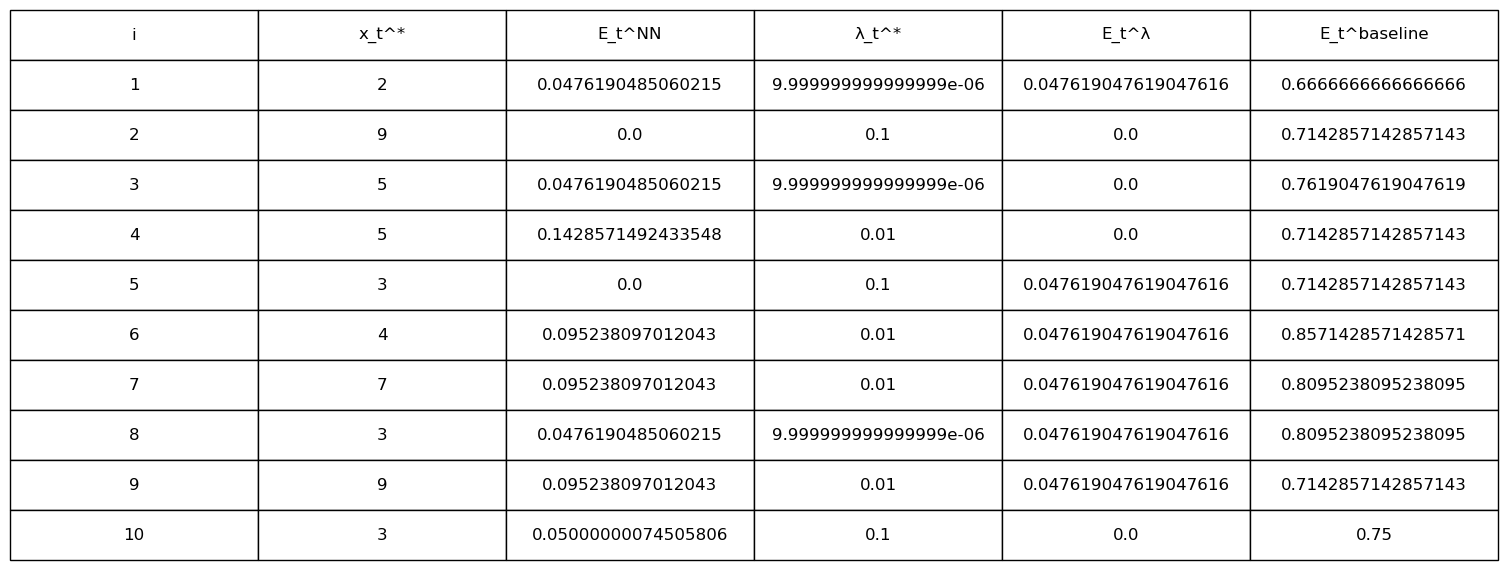

In [88]:
import matplotlib.pyplot as plt

num_folds = len(baseline_error_rates)

table_data = [
    [
        fold + 1,
        hidden_units[fold],
        error_rates_from_hidden_units[fold],
        lambda_values[fold],
        error_rates_from_lambda[fold],
        baseline_error_rates[fold],
    ]
    for fold in range(num_folds)
]

# Column headers (as shown in the image)
col_labels = ["i", "x_t^*", "E_t^NN", "λ_t^*", "E_t^λ", "E_t^baseline"]

# Create the plot
fig, ax = plt.subplots()
ax.axis("off")

# Plot the table
table = ax.table(
    cellText=table_data, colLabels=col_labels, loc="center", cellLoc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 3)

plt.show()

# Evaluation of models using mc neymar test
![mc_neymar](museum_of_poor/mc_neymar.png)
Perform a statistical evaluation of your three models similar to the previous section. That
is, compare the three models pairwise. We will once more allow some freedom in what test
to choose. Therefore, choose either:
setup I (section 11.3): Use McNemar’s test described in Box 11.3.2)
setup II (section 11.4): Use the method described in Box 11.4.1)
Include p-values and confidence intervals for the three pairwise tests in your report and
conclude on the results: Is one model better than the other? Are the two models better
than the baseline? Are some of the models identical? What recommendations would you
make based on what you’ve learned?

### To ensure a fair comparison, we need to perform the train and test on the same split

In [98]:
yhat_dummy = []
yhat_log = []
yhat_ann = []
y_true = []
lambdas = np.power(10.0, range(-5, 5))
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    y_true.append(y_test)

    # One-hot encoding
    Y_train_hot = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train_hot[i, label] = 1

    # Dummy classifier
    baseline = DummyClassifier(strategy='most_frequent')
    baseline.fit(X_train, y_train)
    y_dummy_pred = baseline.predict(X_test)
    yhat_dummy.append(y_dummy_pred)
    (
        _,
        opt_lambda,
        _,
        _,
        _,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    Xty = X_train.T @ Y_train_hot
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_class = np.argmax(softmax(prediction_logits), axis=1)
    yhat_log.append(predicted_class)

    X_train_tensor = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train_tensor = torch.from_numpy(y[train_index]).type(torch.long)
    X_test_tensor = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test_tensor = torch.from_numpy(y[test_index]).type(torch.long)
    error_rates_and_hidden_units = []
    input_features = M - 1
    num_epochs = 300
    loss_fn = torch.nn.CrossEntropyLoss()
    seed_model = lambda: torch.nn.Sequential(
        torch.nn.Linear(input_features, n_hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(n_hidden_units, C),
        torch.nn.Softmax(dim=1),
    )
    for n_hidden_units in range(
        initial_hidden_units, initial_hidden_units + hidden_units_range
    ):
        # in the actual code, we would vary the number of hidden_units here
        # e.g. for i in range (100) -> calculate mean_error_rate
        # Recall that last column represents the classes and should not be used as an input feature

        net, final_loss, learning_curve = train_neural_net(
            seed_model,
            loss_fn,
            X=X_train_tensor,
            y=y_train_tensor,
            n_replicates=3,
            max_iter=num_epochs,
        )

        # Determine probability of each class using trained network
        softmax_logits = net(X_test_tensor)
        # convert to label with the highest probability
        y_pred = torch.argmax(softmax_logits, dim=1)
        # Compare error against ground truth y_test
        e = y_pred != y_test_tensor
        error_rate = sum(e) / len(e)
        error_rates_and_hidden_units.append((error_rate, n_hidden_units, y_pred))


    _, _, best_pred = min(
        error_rates_and_hidden_units, key=itemgetter(0)
    )
    yhat_ann.append(best_pred)
yhat_dummy = np.concatenate(yhat_dummy)
yhat_log = np.concatenate(yhat_log)
yhat_ann = np.concatenate(yhat_ann)
y_true = np.concatenate(y_true)
yhat_dummy.shape, yhat_log.shape, yhat_ann.shape, y_true.shape


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.92248374	0.00069204526

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.92420894	0.0012064892

	Replicate: 3/3
		Iter	Loss			Rel. loss


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/dtuimldmtools/models/nn_trainer.py:141: RuntimeWarning: overflow encountered in cast
  if loss_value < best_final_loss:


		Final loss:
		300	0.9145182	0.000425809

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7613048	0.00045138874

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.83934915	0.00068459276

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.79108906	0.00093483547

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.93311954	0.000211962

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8555718	0.00064532156

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8634081	0.00084357546

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.76729244	0.00061858556

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7963031	0.00039648192

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.71795124	0.00071081374

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7329912	0.0010843235

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.709167	0.00063257123

	Replicate: 3/3
		Ite

((209,), (209,), (209,), (209,))

In [99]:
yhats = [yhat_dummy, yhat_log, yhat_ann]
yhats

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
        0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0

In [100]:
import itertools
from dtuimldmtools import mcnemar

model_names = ["Dummy", "Logistic", "ANN"]

alpha = 0.05

for i, j in itertools.combinations(range(len(yhats)), 2):
    yhat_A = yhats[i]
    yhat_B = yhats[j]
    model_A = model_names[i]
    model_B = model_names[j]

    # Compute McNemar's test with Jeffreys interval
    [thetahat, CI, p] = mcnemar(y_true, yhat_A, yhat_B, alpha=alpha)

    print(f"\nComparison: {model_A} (A) vs {model_B} (B)")
    print(f"theta = theta_A - theta_B point estimate: {thetahat:.4f}")
    print(f"CI (Jeffreys, {1-alpha:.0%}): {CI}")
    print(f"p-value: {p:.4f}")
    if p < alpha:
        print(f"-> Significant difference (p < {alpha})")
    else:
        print(f"-> No significant difference (p >= {alpha})")

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[ 49.   1.]
 [154.   5.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.7903905658158767), np.float64(-0.6678610318907889))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 6.831330013583483e-45

Comparison: Dummy (A) vs Logistic (B)
theta = theta_A - theta_B point estimate: -0.7321
CI (Jeffreys, 95%): (np.float64(-0.7903905658158767), np.float64(-0.6678610318907889))
p-value: 0.0000
-> Significant difference (p < 0.05)
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[ 45.   5.]
 [153.   6.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.7730079737018365), np.float64(-0.6367254737946959))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 4.353903019651069e-39

Comparison: Dummy (A) vs ANN (B)
theta = theta_A - theta_B point estimate: -0.7081
CI (Jeffreys, 95%): (np.float64(-

## Final regression model with $\lambda$ = 0.01

In [ ]:
error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    # One-hot encoding
    Y_train = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train[i, label] = 1
    opt_lambda = 0.01
    Xty = X_train.T @ Y_train
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_classes = np.argmax(softmax(prediction_logits), axis=1)
    e = predicted_classes != y_test
    error_rate = sum(e) / len(e)
    error_rates.append(error_rate)
    print(
        f"Number of miss-classifications for logic regression model with optimal lambda value {opt_lambda}:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )
error_rates, len(error_rates)

Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal

([np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.0),
  np.float64(0.15)],
 10)